<a href="https://colab.research.google.com/github/molinacle/desafio_latam/blob/main/Desaf%C3%ADo_Latam_Desaf%C3%ADo_6_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESAFÍO LATAM - DESAFÍO 6**
---

*   ALUMNO: SEBASTIÁN MOLINA
*   MODULO: MACHINE LEARNING
*   CARRERA: DATA SCIENCE

---
**CONTEXTO**

 - Se te presenta el desafiante escenario de predecir las ventas mensuales de una tienda utilizando técnicas de análisis de series de tiempo. El objetivo principal es aplicar un enfoque riguroso de análisis y modelado de series de tiempo para realizar predicciones precisas de las ventas futuras.

 - La tienda ha recopilado datos históricos de ventas mensuales durante varios años, en el archivo Sales_Data.xlsx. Tu tarea es desarrollar un modelo que sea capaz de predecir las ventas mensuales futuras basándose en estos datos.

In [61]:
pip install pmdarima

In [62]:
# Importación de Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [63]:
# Carga de datos
sales_data = pd.read_excel('Sales_Data.xlsx')

In [64]:
print(sales_data)
print('---------------------------')
print(sales_data.shape)
print('---------------------------')
print(sales_data.describe())
print('---------------------------')
print(sales_data.info())

   Order Date        Sales
0  2015-01-01   14205.7070
1  2015-02-01    4519.8920
2  2015-03-01   55205.7970
3  2015-04-01   27906.8550
4  2015-05-01   23644.3030
5  2015-06-01   34322.9356
6  2015-07-01   33781.5430
7  2015-08-01   27117.5365
8  2015-09-01   81623.5268
9  2015-10-01   31453.3930
10 2015-11-01   77907.6607
11 2015-12-01   68167.0585
12 2016-01-01   18066.9576
13 2016-02-01   11951.4110
14 2016-03-01   32339.3184
15 2016-04-01   34154.4685
16 2016-05-01   29959.5305
17 2016-06-01   23599.3740
18 2016-07-01   28608.2590
19 2016-08-01   36818.3422
20 2016-09-01   63133.6060
21 2016-10-01   31011.7375
22 2016-11-01   75249.3995
23 2016-12-01   74543.6012
24 2017-01-01   18542.4910
25 2017-02-01   22978.8150
26 2017-03-01   51165.0590
27 2017-04-01   38679.7670
28 2017-05-01   56656.9080
29 2017-06-01   39724.4860
30 2017-07-01   38320.7830
31 2017-08-01   30542.2003
32 2017-09-01   69193.3909
33 2017-10-01   59583.0330
34 2017-11-01   79066.4958
35 2017-12-01   95739.1210
3

In [65]:
sales_data.set_index('Order Date', inplace=True)

In [66]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2015-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


<Axes: xlabel='Order Date'>

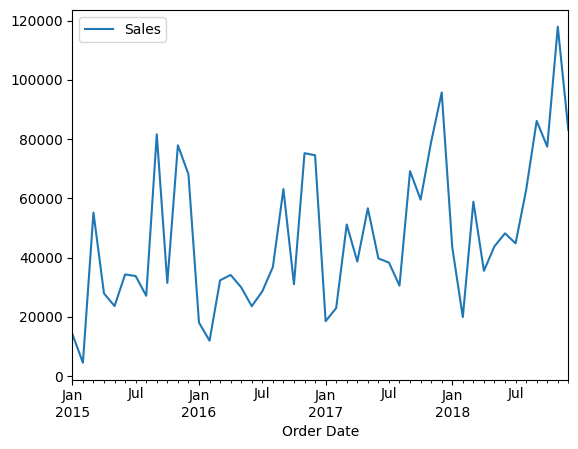

In [67]:
sales_data.plot()

---
**Paso 1: Descomposición de la Serie de Tiempo**
---
Comenzaremos cargando los datos y realizando la descomposición de la serie de tiempo para identificar tendencia, estacionalidad y residuos.

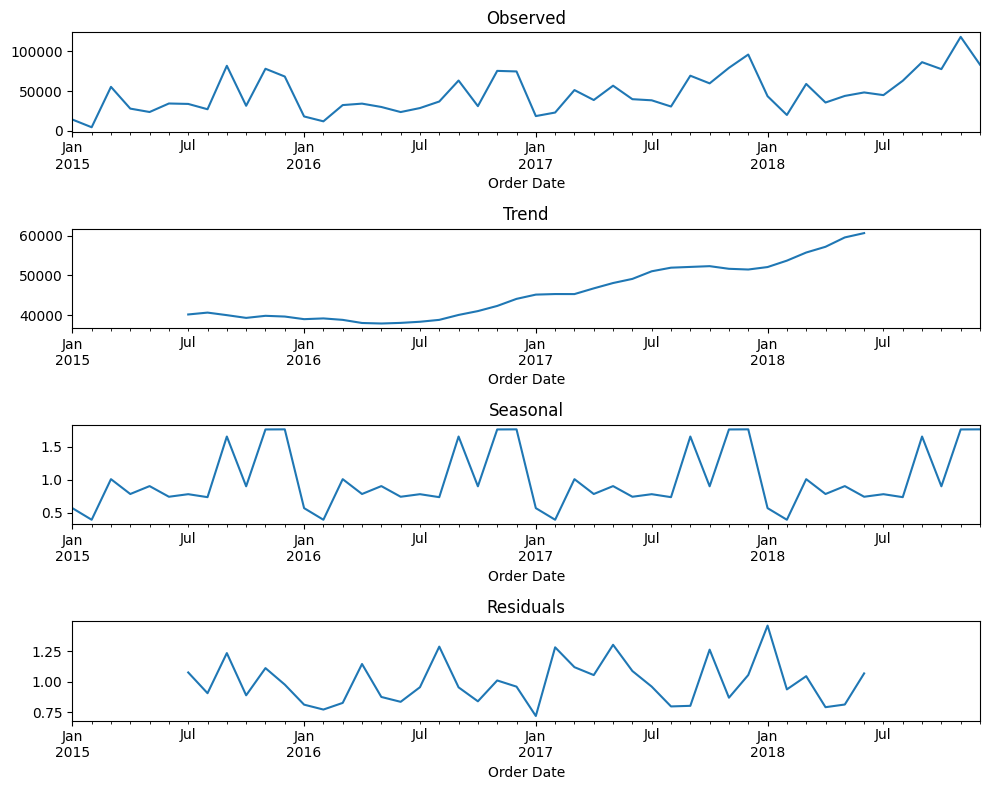

In [68]:
# Descomposición de la serie de tiempo
result = seasonal_decompose(sales_data['Sales'], model='multiplicative')

# Visualización de componentes
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
result.observed.plot(ax=axes[0], title='Observed')
result.trend.plot(ax=axes[1], title='Trend')
result.seasonal.plot(ax=axes[2], title='Seasonal')
result.resid.plot(ax=axes[3], title='Residuals')
plt.tight_layout()
plt.show()

Inicialmente podemos inferir que se trata de una serie estacionaria pero debemos confirmarlo con el test de Dickey-Fuller.

---
**Paso 2: Identificación de Parámetros ARIMA**
---
Usaremos ACF y PACF para identificar los valores de p y q en el modelo ARIMA, y el test de Dickey-Fuller para verificar la estacionaridad.

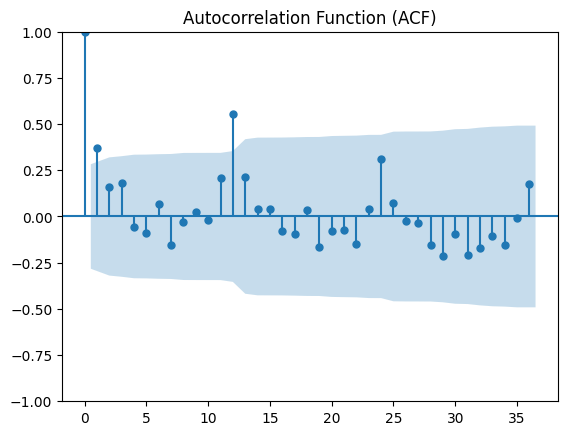

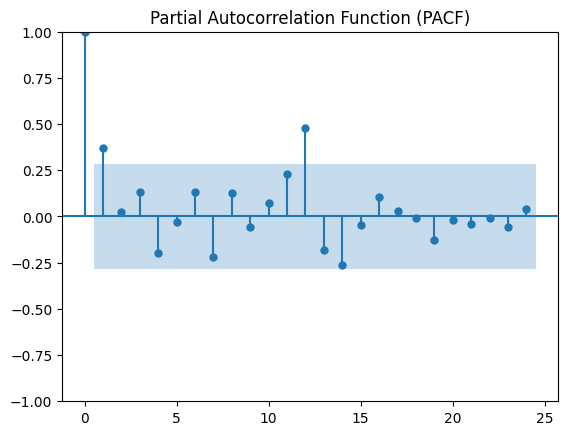

ADF Statistic: -4.416136761430769
p-value: 0.00027791039276670623


In [69]:
# Funciones de autocorrelación
plot_acf(sales_data['Sales'], lags=36)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(sales_data['Sales'], lags=24)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Test de Dickey-Fuller
adf_result = adfuller(sales_data['Sales'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

Gracias a la visualización de las funciones de autocorrelación hemos determinado los valores para p y q, también gracias al resultado del test de Dickie-Fuller podemos determinar que la serie es estacional, por lo que trabajaremos con un valor d=0 en el modelo ARIMA.

---
**Paso 3: Modelado con ARIMA**
---
Usaremos los parámetros identificados para ajustar el modelo ARIMA a los datos históricos de ventas.

In [70]:
# Ajuste del modelo ARIMA
model = ARIMA(sales_data['Sales'], order=(12, 0, 2))
model_fit = model.fit()

# Resumen del modelo
print(model_fit.summary())

# Predicciones
forecast = model_fit.forecast(steps=1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                ARIMA(12, 0, 2)   Log Likelihood                -527.686
Date:                Mon, 08 Apr 2024   AIC                           1087.372
Time:                        03:50:09   BIC                           1117.311
Sample:                    01-01-2015   HQIC                          1098.686
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.712e+04   1.45e+04      3.252      0.001    1.87e+04    7.55e+04
ar.L1          0.3732      0.249      1.502      0.133      -0.114       0.860
ar.L2         -0.3421      0.265     -1.289      0.1

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


---
**Paso 4: Evaluación de Predicciones**
---
Dividiremos los datos históricos en conjuntos de entrenamiento y prueba, ajustaremos el modelo ARIMA y evaluaremos las predicciones.

In [71]:
# División en conjunto de entrenamiento y prueba
train_size = int(len(sales_data) * 0.8)
train, test = sales_data.iloc[:train_size], sales_data.iloc[train_size:]

# Ajuste del modelo ARIMA con datos de entrenamiento
model = ARIMA(train['Sales'], order=(11, 0, 36))
model_fit = model.fit()

# Autoarima
auto_arima = auto_arima(train['Sales'], seasonal=True, m=24)

# Predicciones en conjunto de prueba
forecast = model_fit.forecast(steps=len(test))
forecast_autoarima = auto_arima.predict(n_periods=len(test))

# Evaluación de predicciones
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test['Sales'], forecast)
mae = mean_absolute_error(test['Sales'], forecast)

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum 

Mean Squared Error (MSE): 792366753.1769617
Mean Absolute Error (MAE): 22705.071473894168


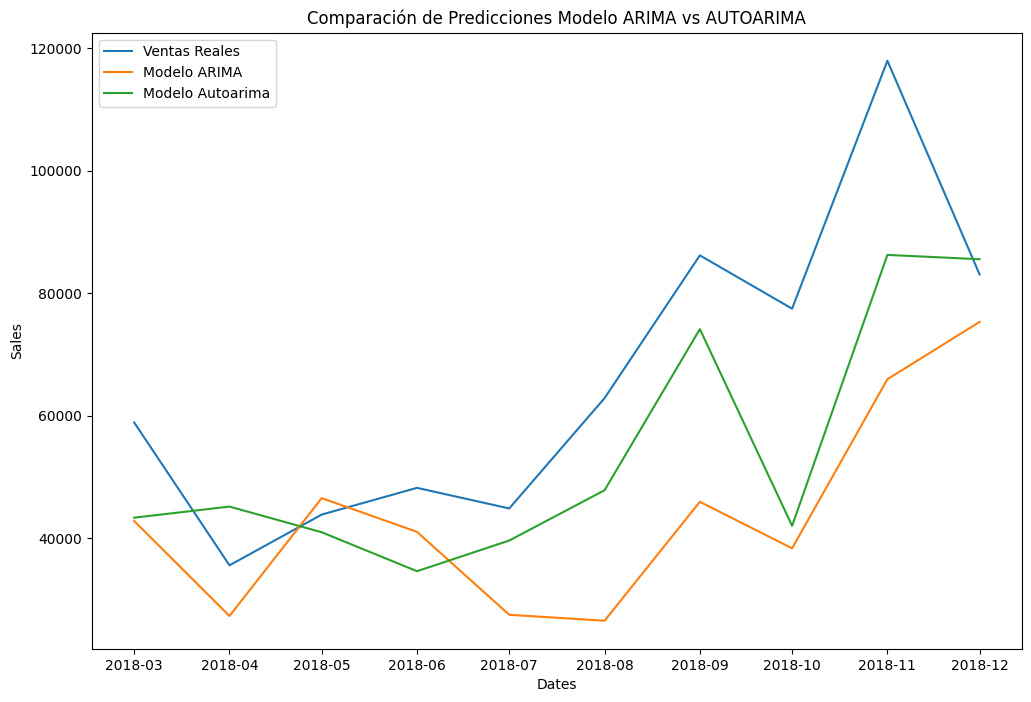

In [72]:
# Comparación visual de los modelos
plt.figure(figsize=(12,8))
plt.plot(test.index, test['Sales'], label='Ventas Reales')
plt.plot(test.index, forecast, label='Modelo ARIMA')
plt.plot(test.index, forecast_autoarima, label='Modelo Autoarima')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.title('Comparación de Predicciones Modelo ARIMA vs AUTOARIMA')
plt.legend()
plt.show()